In [1]:
%cd ../..

/home/eduardo/Desktop/Projects/Tech-Test-ML-Coin


In [4]:
import os

import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from src.experiment.utils import get_train_val_split

In [11]:
path_images = sorted([f"data/img/{p}" for p in os.listdir('data/img/')])
path_masks = sorted([f"data/mask/{p}" for p in os.listdir('data/mask/')])

## Looking at the coins masks

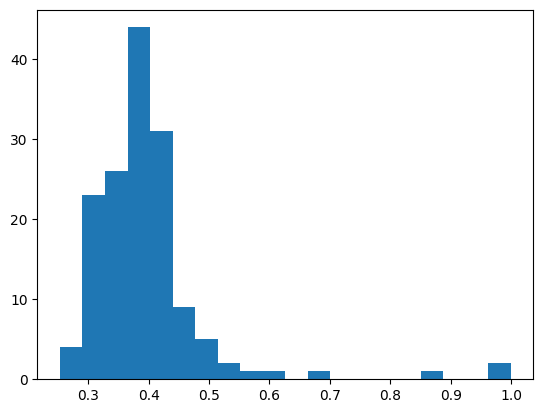

In [14]:
# Calculating the radius in pixel of the coins normalized by its total area
areas = []
for path_mask in path_masks:
        mask = cv2.imread(path_mask, cv2.IMREAD_GRAYSCALE)
        areas.append(
            np.sum(mask > 0)/ (mask.shape[0] * mask.shape[1])
        )
plt.hist(areas, bins=20);

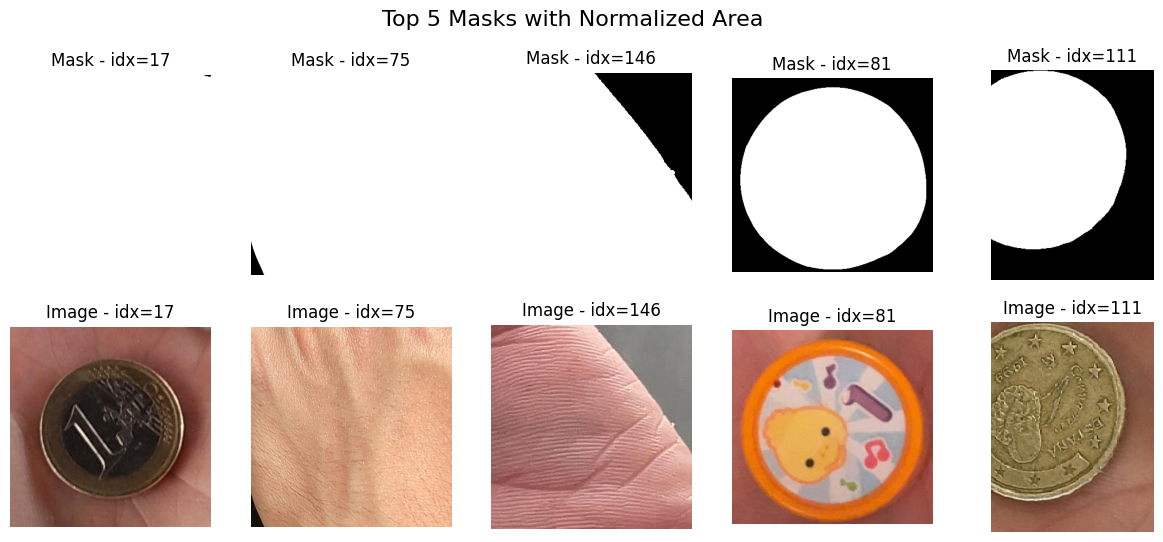

In [33]:
idxes = np.argsort(areas)[::-1][:5]
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
plt.suptitle("Top 5 Masks with Normalized Area", fontsize=16)
for i, idx in enumerate(idxes):
    axes[0, i].imshow(cv2.imread(path_masks[idx], cv2.IMREAD_GRAYSCALE), cmap='gray')
    axes[0, i].set_title(f"Mask - {idx=}")
    axes[0, i].axis('off')
    axes[1, i].imshow(np.array(Image.open(path_images[idx])))
    axes[1, i].set_title(f"Image - {idx=}")
    axes[1, i].axis('off')

plt.savefig("./assets/top-5-normalized-area.png")

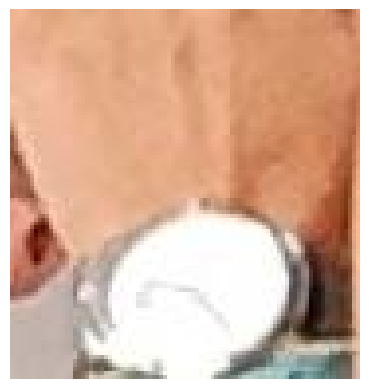

In [44]:
small = []
for path_image in path_images:
    image = cv2.imread(path_image)
    if image.shape[0] <= 110 and image.shape[1] <= 110:
        small.append(path_image)

if len(small)==1:
    plt.imshow(np.array(Image.open(small[0])))
    plt.axis("off")
    plt.savefig("./assets/small-image.png")